In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hisham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("dataset.csv")
# Display the first two rows of the 'data' dataset
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.shape

(114000, 21)

In [4]:
data.drop(data.columns[0], axis=1, inplace=True)
data.shape

(114000, 20)

In [5]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
data.popularity.min()

0

In [8]:
data.popularity.max()

100

# Data Analysis (EDA)

In [9]:
features_with_nan=[feature for feature in data.columns if data[feature].isna().sum()>0]
features_with_nan

['artists', 'album_name', 'track_name']

In [10]:
for feature in features_with_nan:
    print('Number of missing value in {}: {}'.format(feature,np.round(data[feature].isna().sum())))

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


In [11]:
 data=data.dropna()

In [12]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(113549, 20)

In [15]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [16]:
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

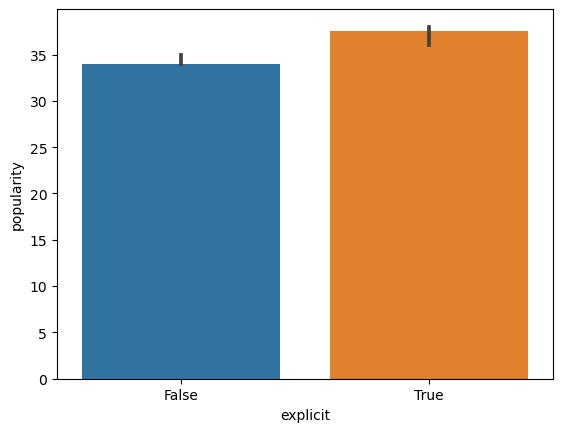

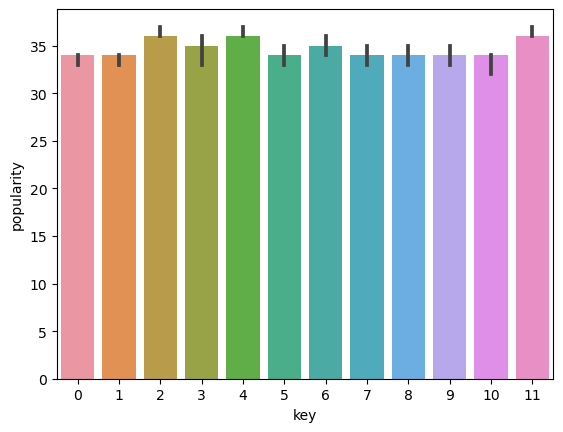

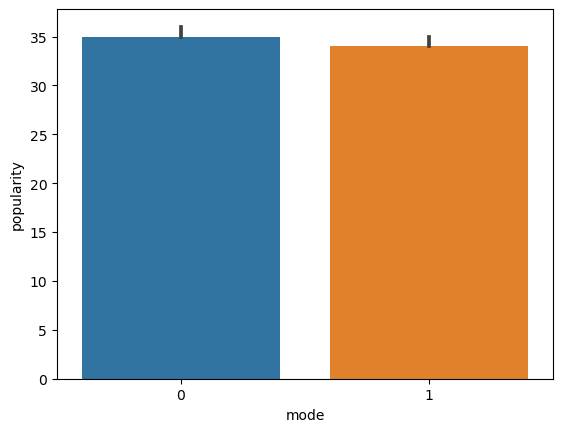

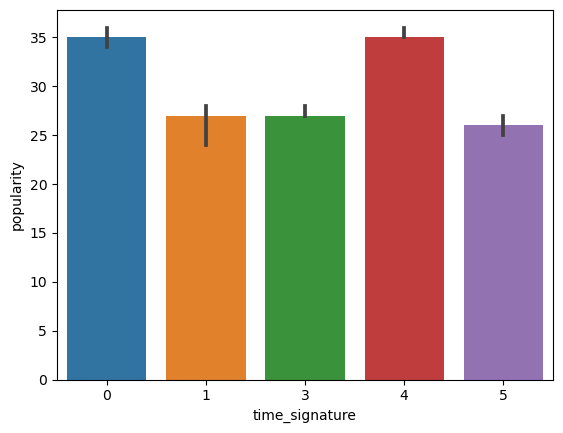

In [17]:
for feature in feature_discrete_numerical:
    dataset=data.copy()
    sns.barplot(x=feature, y=dataset['popularity'], data=dataset, estimator=np.median)
    plt.show()

In [18]:
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]

In [19]:
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

popularity skewness is : 0.04222809948109981


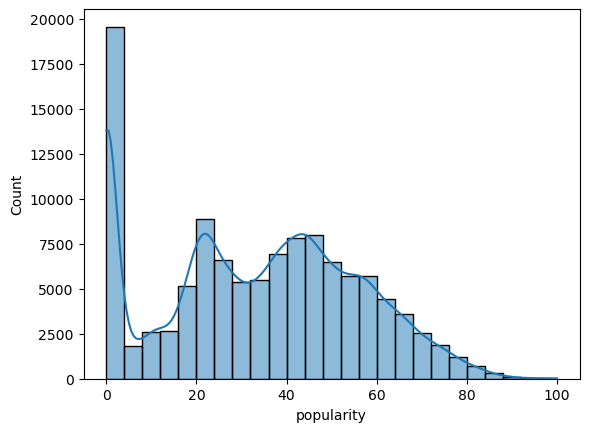

duration_ms skewness is : 10.814434004933338


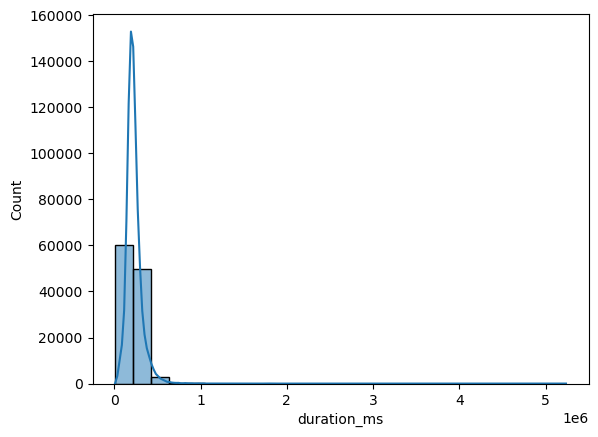

danceability skewness is : -0.4003991295600715


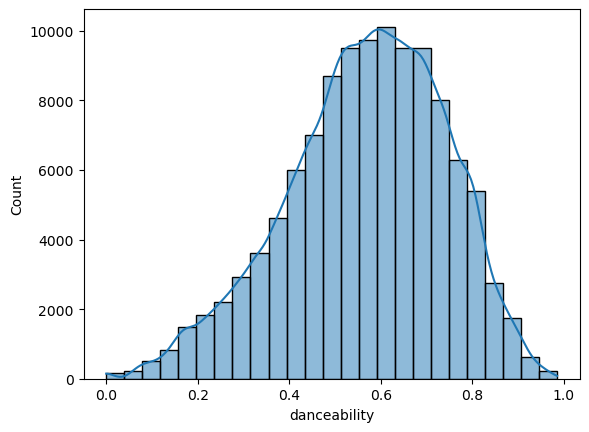

energy skewness is : -0.598542182428158


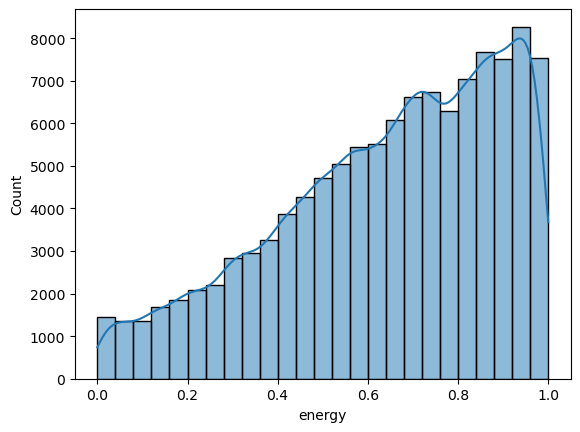

loudness skewness is : -2.0133133823721505


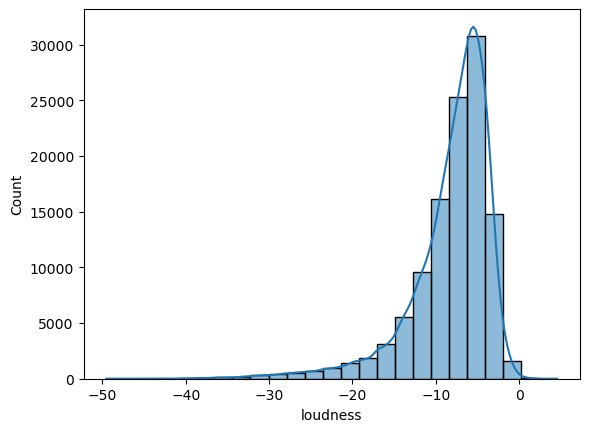

speechiness skewness is : 4.644508700286168


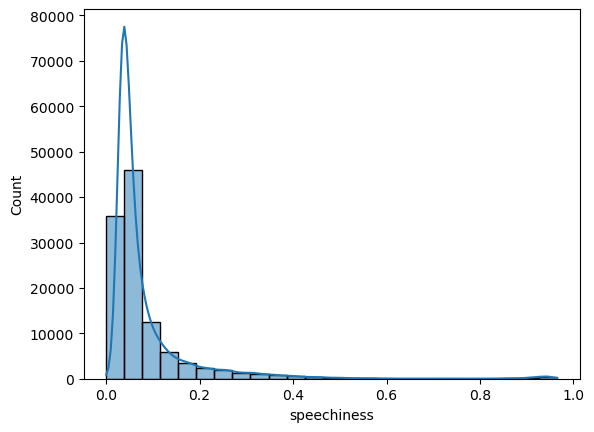

acousticness skewness is : 0.7302103030827026


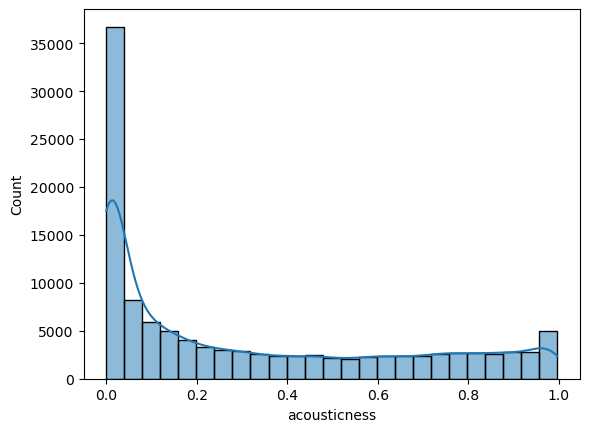

instrumentalness skewness is : 1.7377466866935405


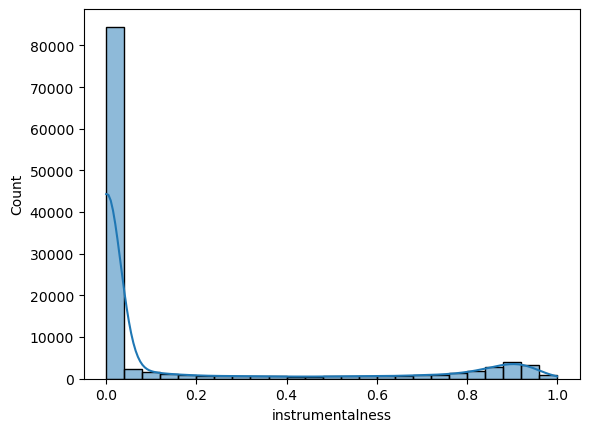

liveness skewness is : 2.1054497237799685


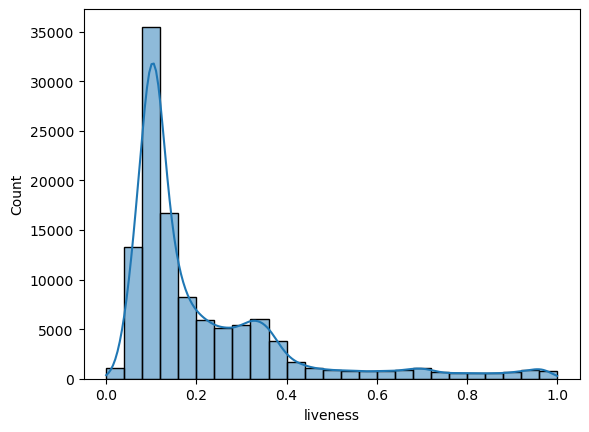

valence skewness is : 0.11477275798096229


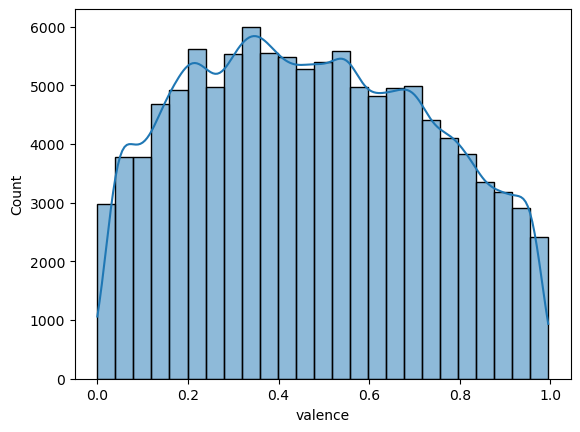

tempo skewness is : 0.23160111991386964


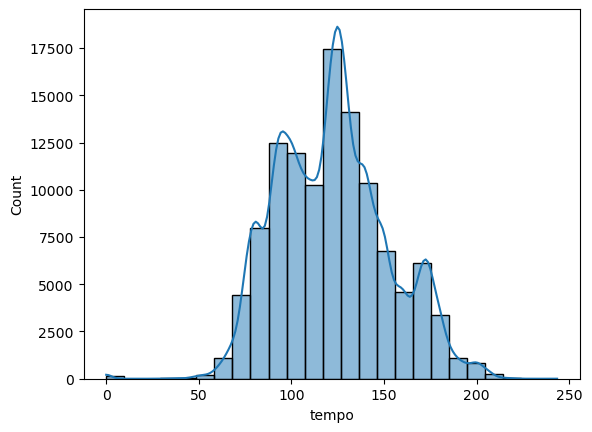

In [20]:
from scipy.stats import skew
for feature in features_continuous_numerical:
    dataset=data.copy()
    print(feature, 'skewness is :', skew(dataset[feature]))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    plt.show()

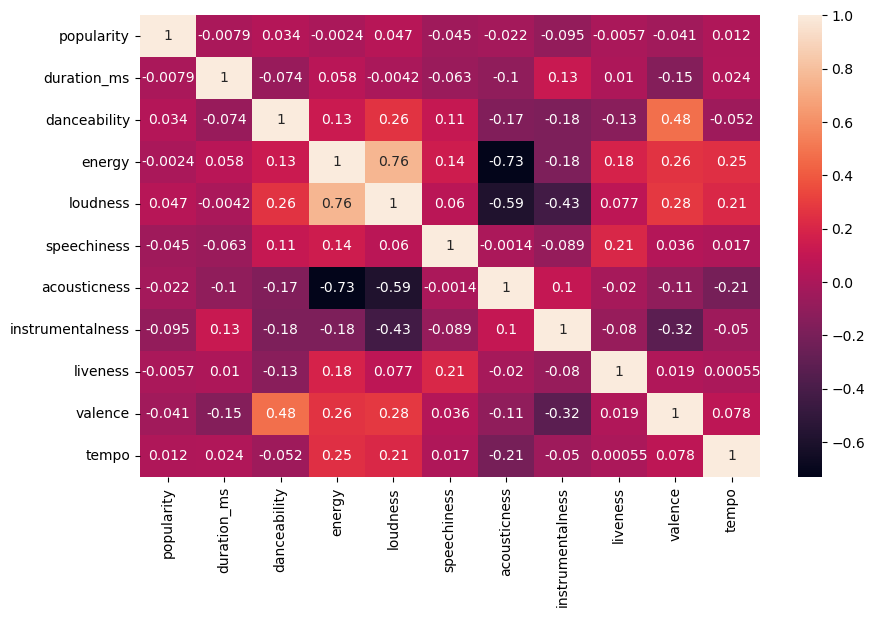

In [21]:
dataset=data.copy()
plt.figure(figsize=(10,6))
sns.heatmap(data[features_continuous_numerical].corr(), annot=True)
plt.show()

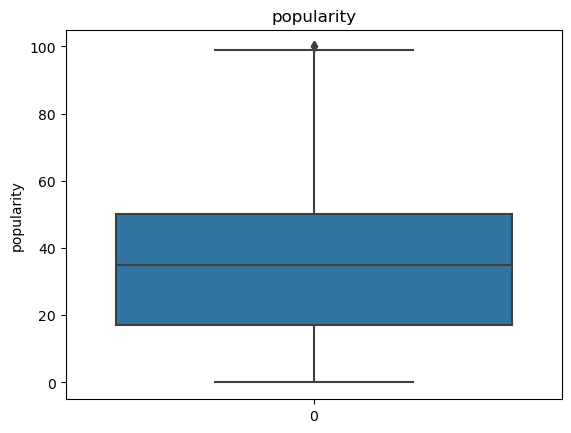

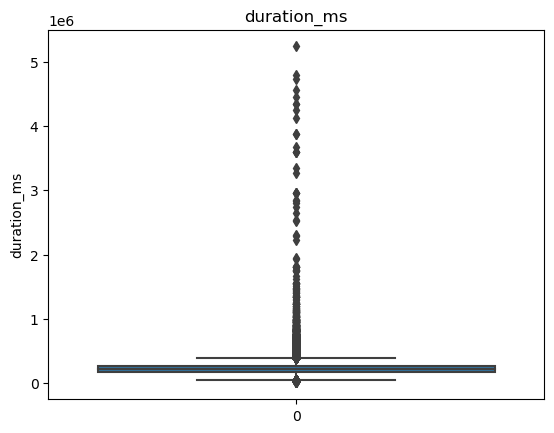

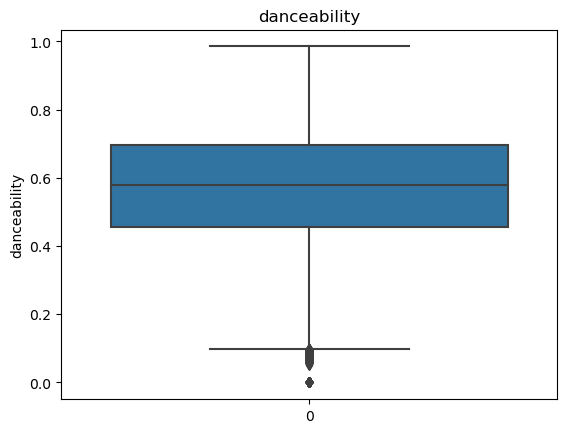

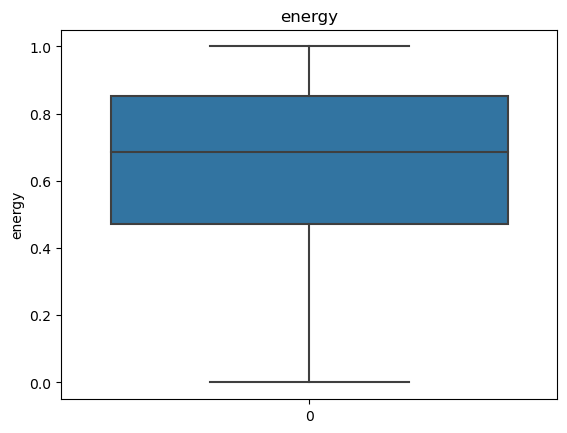

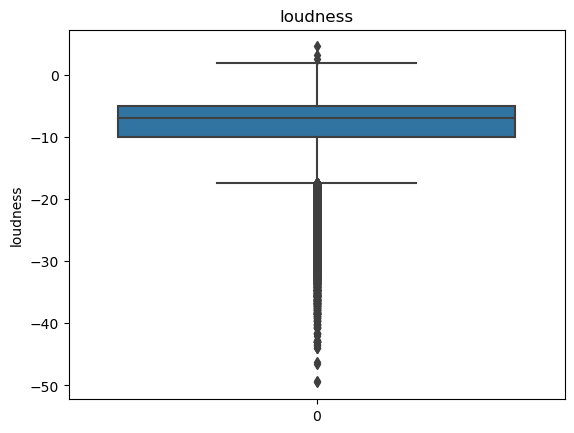

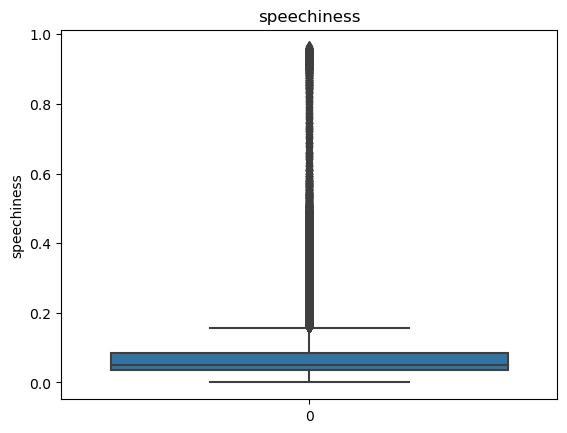

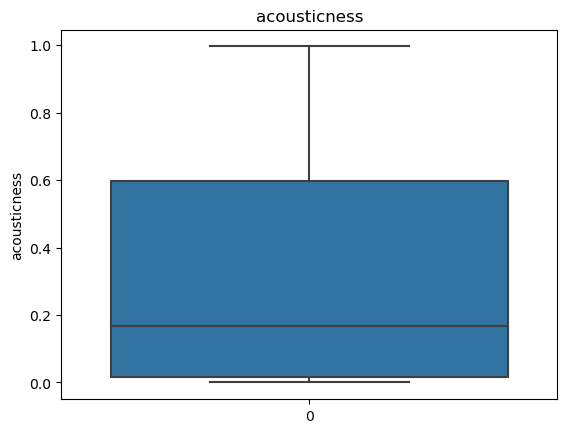

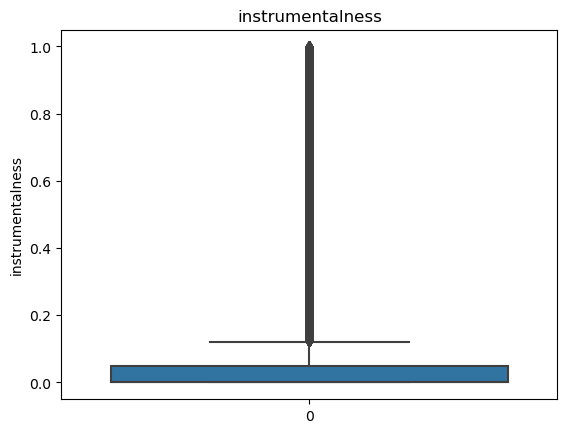

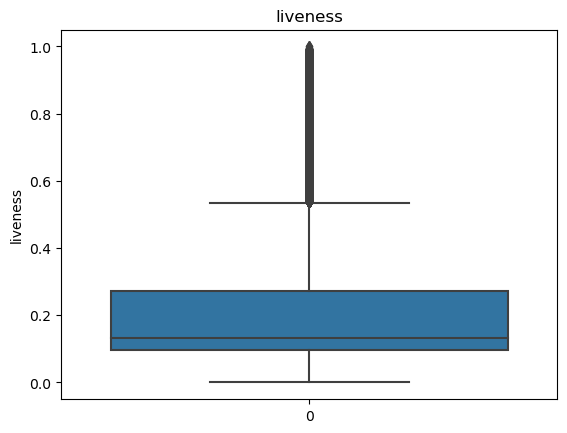

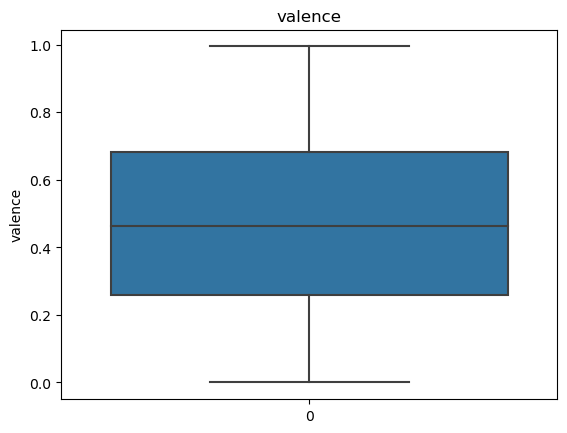

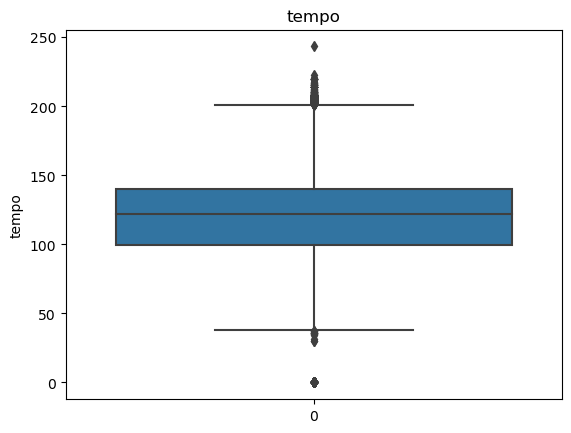

In [22]:
for feature in features_continuous_numerical:
    dataset=data.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


We see that apart from energy, acousticness and valence, there are a lot of outliers in most of the features.

In [23]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [24]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Among the categorical features, track_id would be unique for each entry. Later we can drop this column. Lets check the cardinality of the categorical features to know the number of unique variables.

In [25]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


Observation: There are a lot of unique entries in each of the categorical features.

Most of the categorical features are names like track name, album name, artist name, etc. track_id is unique for every song/track. We can later drop this. track_genre can have effect in popularity.

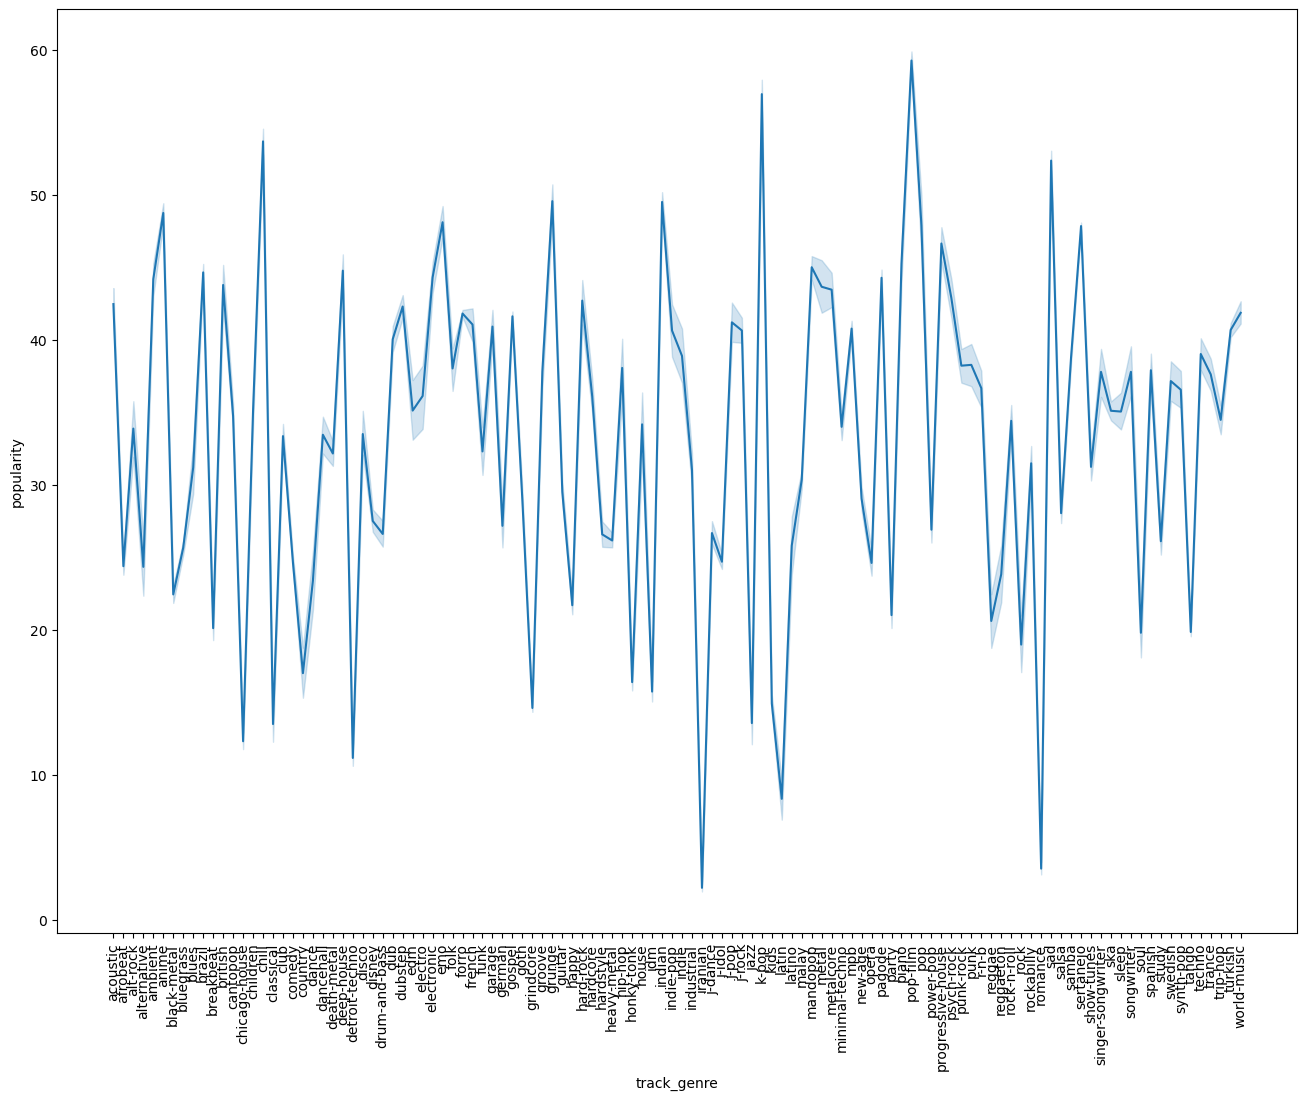

In [26]:
dataset=data.copy()
plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()

# Feature engineering

1.Convert the speechiness column to represent the presence of spoken words in a track.

2.Remove the skewness of the data for continuous numerical features for prediction using regression algorithm.

3.Encoding the categorical variables.

4.Standardise the values of the variables to the same range.

In [27]:
data['speechiness'].sort_values()

101681    0.000
98779     0.000
101663    0.000
101666    0.000
101667    0.000
          ...  
18227     0.962
18432     0.962
18530     0.963
18504     0.963
18152     0.965
Name: speechiness, Length: 113549, dtype: float64

In [28]:
speechiness_type=[]
for i in data.speechiness:
    if i<0.33:
        speechiness_type.append('Low')
    elif 0.33<=i<=0.66:
        speechiness_type.append('Medium')
    else:
        speechiness_type.append('High')

In [29]:
data['speechiness_type']=speechiness_type
print(data.speechiness_type.value_counts())
data.head()

Low       109947
Medium      2726
High         876
Name: speechiness_type, dtype: int64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Low


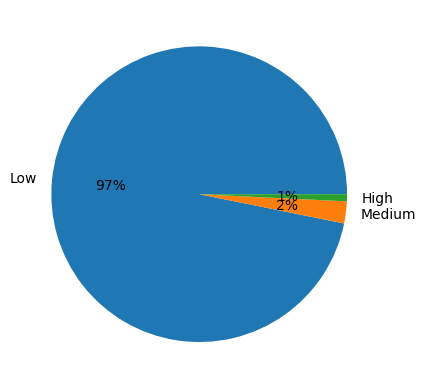

In [30]:
plt.pie(x=data['speechiness_type'].value_counts(),labels=data['speechiness_type'].unique(), autopct='%.0f%%')
plt.show()

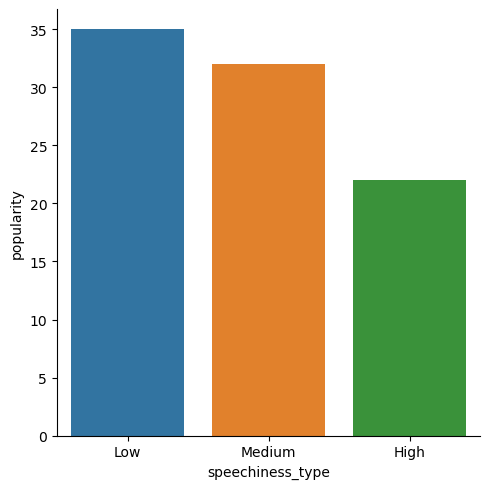

In [31]:
sns.catplot(data=data, x='speechiness_type', y='popularity', kind='bar', errorbar=None, estimator=np.median)
plt.show()

The median popularity of the tracks with low speechiness is high. It shows that people like more melodious songs as compared to rap songs.

In [32]:
data.drop(data.columns[0], axis=1, inplace=True)

In [33]:
#Selecting the numerical features:
feature_numerical=[feature for feature in data.columns if data[feature].dtypes!='O']

In [34]:
#Selecting the discrete numerical features
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]

In [35]:
#Selecting the continuous features
feature_continuous_numerical=[feature for feature in feature_numerical if feature not in feature_discrete_numerical]
feature_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [36]:
data.shape

(113549, 20)

In [37]:
dataset_log=data.copy()
dataset_reci=data.copy()
dataset_sqrt=data.copy()
dataset_expo=data.copy()

In [38]:
from scipy import stats
for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

C:\Users\hisham\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


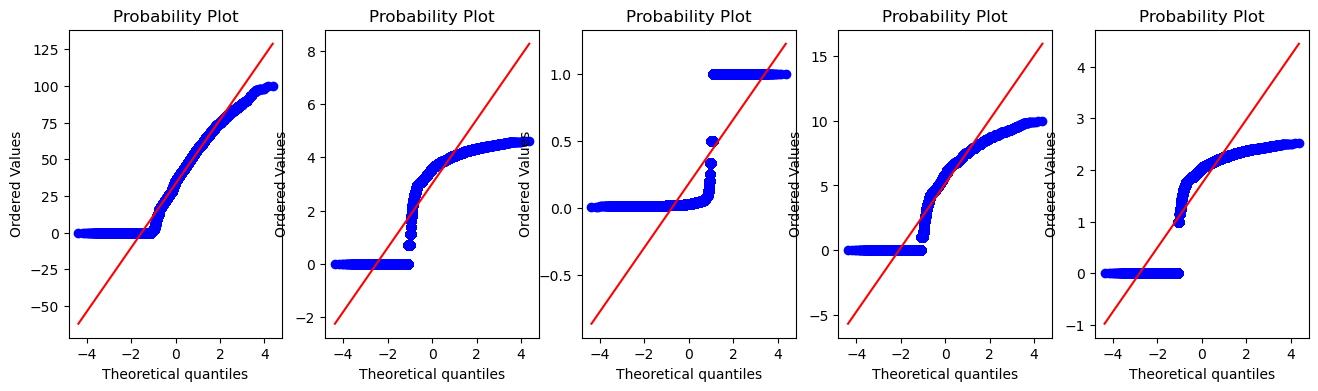

duration_ms original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256


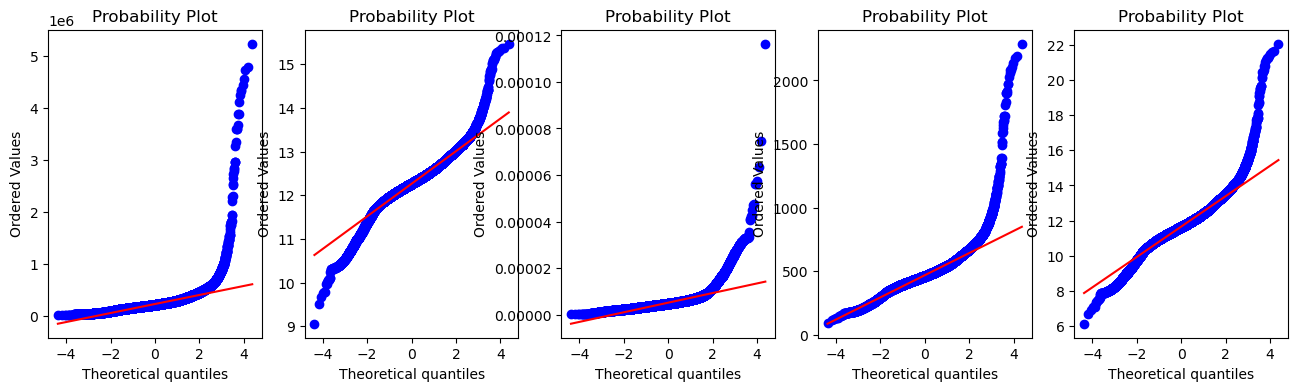

danceability original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756


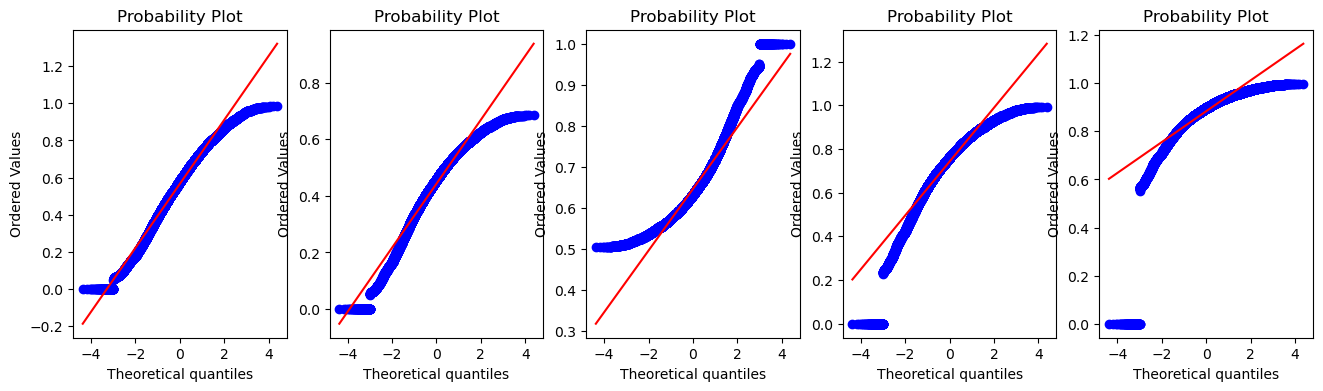

energy original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866


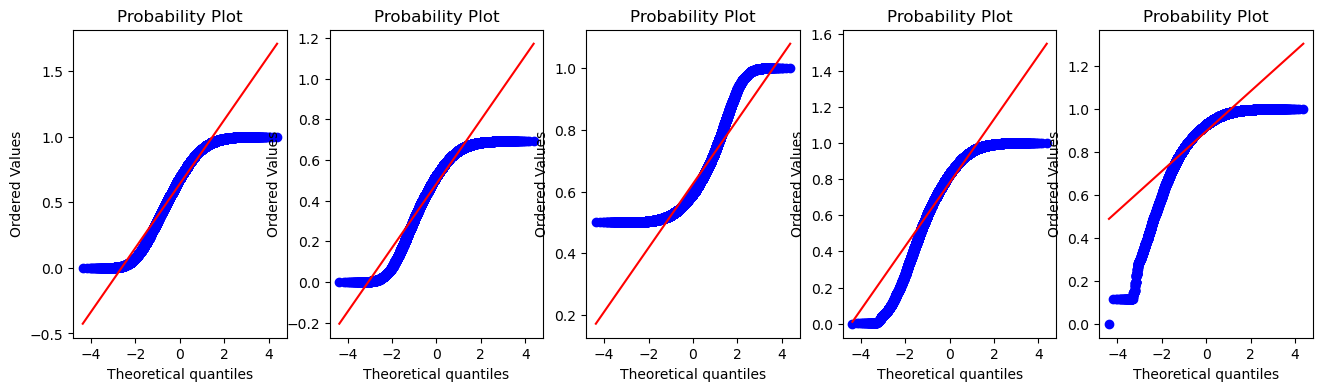

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square-root: nan
exponential: nan


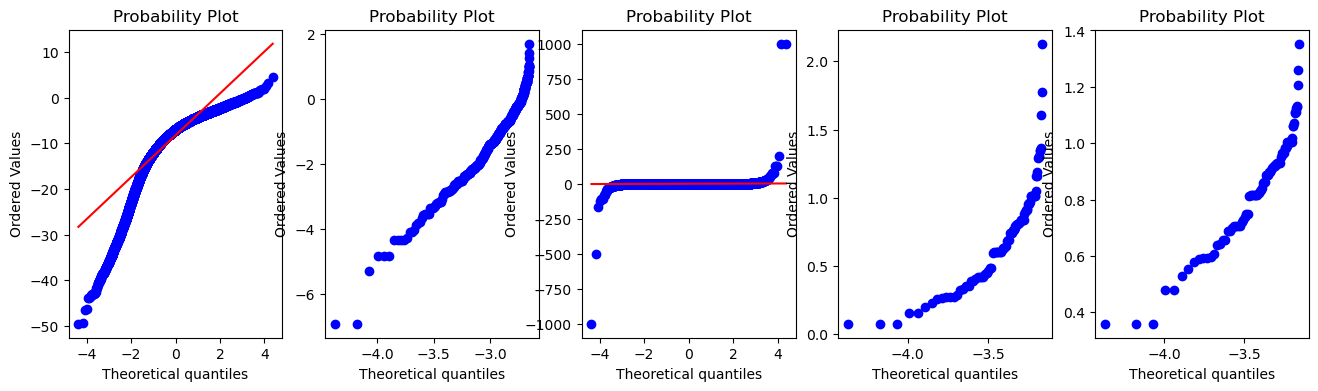

speechiness original skewness: 4.644508700286168
logarithmic: 3.7094268216147412
reciprocal:  -3.0189124109405174
square-root: 2.5106804244132315
exponential: 1.2585346167026825


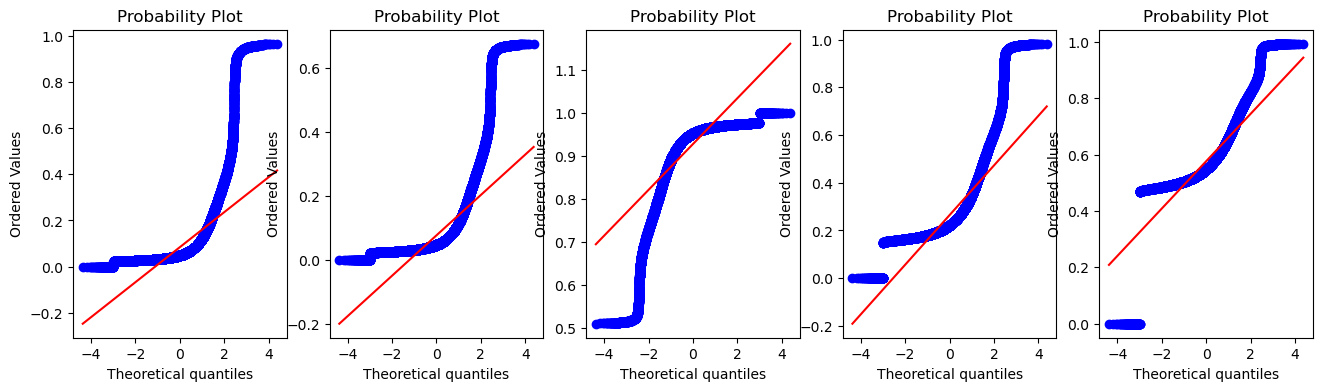

acousticness original skewness: 0.7302103030827026
logarithmic: 0.5532779927877304
reciprocal:  -0.3889970180312751
square-root: 0.19182418700584433
exponential: -0.45691650644198106


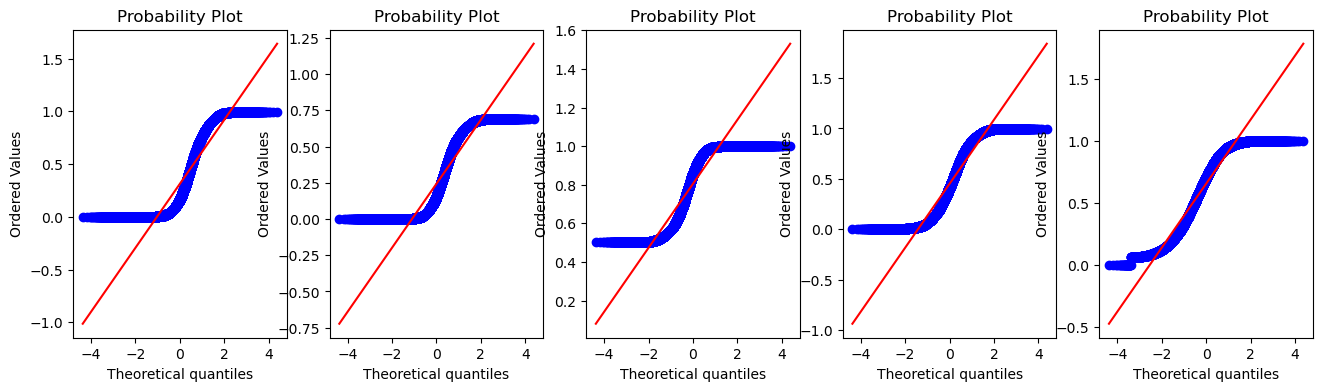

instrumentalness original skewness: 1.7377466866935405
logarithmic: 1.6547543527716166
reciprocal:  -1.5785769487599546
square-root: 1.4467885078056792
exponential: 0.929297080678929


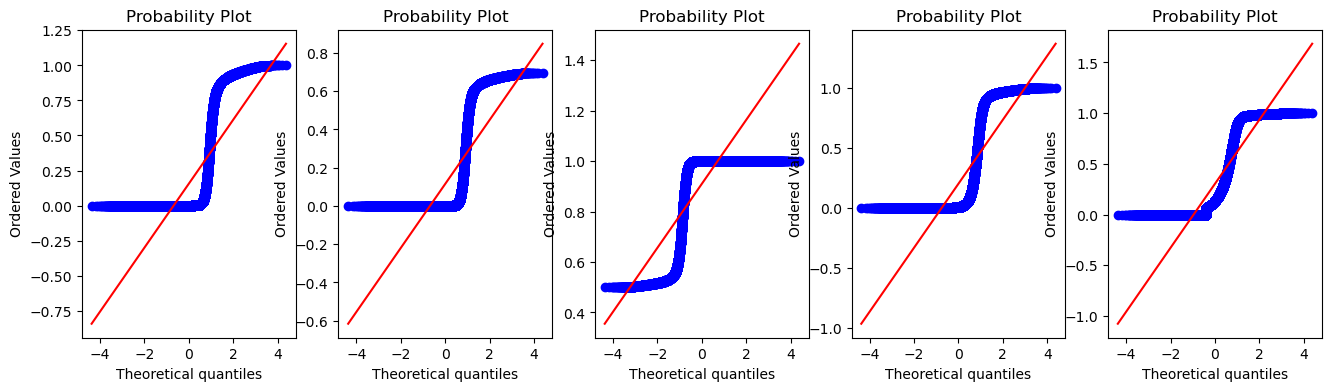

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.3311332380750938
exponential: 0.8567637835174635


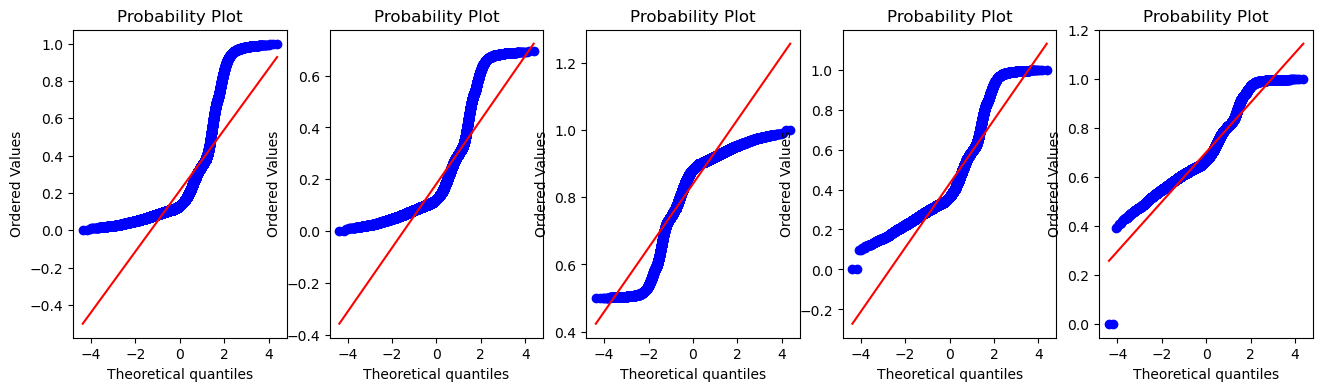

valence original skewness: 0.11477275798096229
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831094
square-root: -0.4685261380695686
exponential: -1.3963500280712502


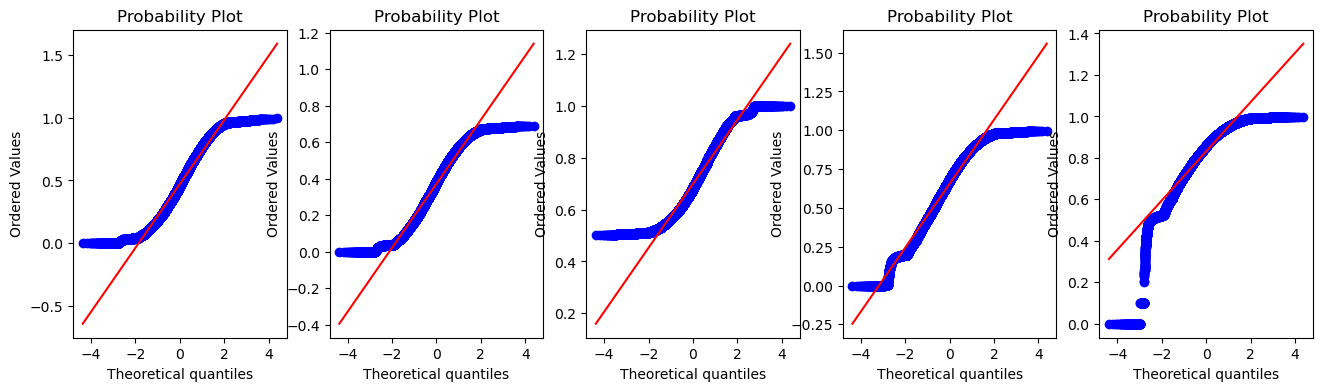

tempo original skewness: 0.23160111991386964
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988584


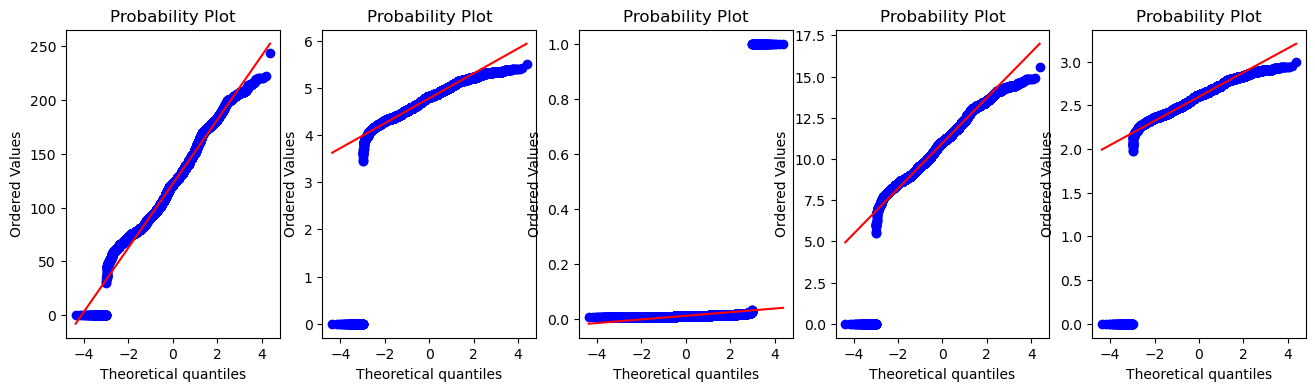

In [40]:
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(data[feature]))
    stats.probplot(data[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()
    

In [41]:
data['acousticness']=data['acousticness']**(1/2)
data[['speechiness','instrumentalness','liveness','duration_ms']]=data[['speechiness','instrumentalness','liveness','duration_ms']]**(1/5)

In [42]:
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,speechiness_type
0,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,acoustic,Low
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,acoustic,Low
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,acoustic,Low
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,acoustic,Low
4,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,acoustic,Low


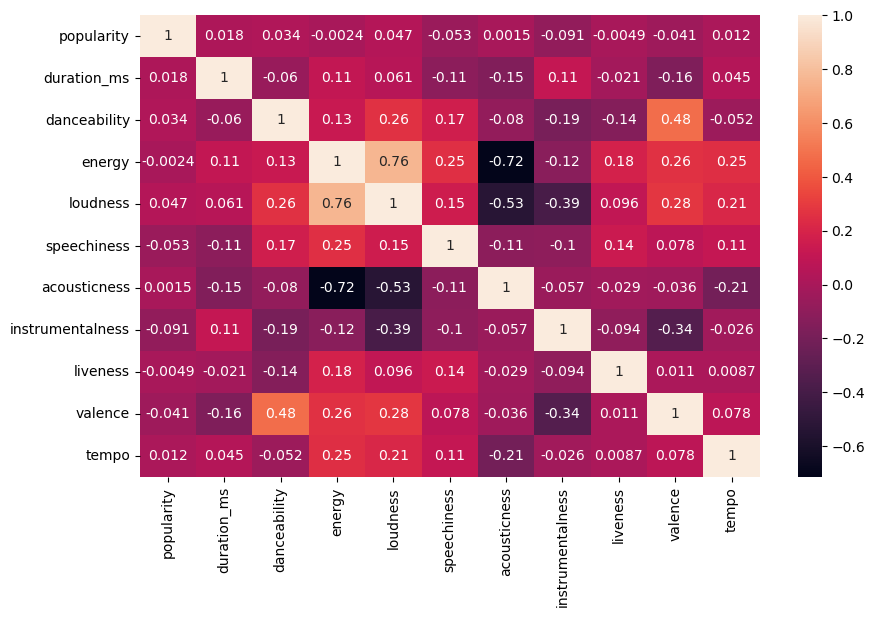

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data[feature_continuous_numerical].corr(), annot=True)
plt.show()

# Encoding the categorical columns:

In [44]:
feature_categorical=[feature for feature in data.columns if feature not in feature_numerical]

In [45]:
dataset=data.copy()
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(data[feature].nunique(), data[feature].isna().sum()))

artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0
speechiness_type : 3, missing values 0


In [46]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 495.5 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 511.6 kB/s eta 0:00:00


In [47]:
import category_encoders as ce

In [48]:
encoder1=ce.BaseNEncoder(cols=['track_genre','album_name', 'track_name','artists'], base=10, return_df=True)
data=encoder1.fit_transform(data)
data.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type
0,0,0,0,0,1,0,0,0,0,1,...,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1,Low
1,0,0,0,0,2,0,0,0,0,2,...,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1,Low
2,0,0,0,0,3,0,0,0,0,3,...,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1,Low
3,0,0,0,0,4,0,0,0,0,4,...,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1,Low
4,0,0,0,0,5,0,0,0,0,5,...,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1,Low


In [49]:
data=pd.get_dummies(data=data, columns=['speechiness_type'], drop_first=True)
print(data.shape)
data.head()

(113549, 35)


,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,0.063221,0.814285,0.715,87.917,4,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,0.088923,0.632214,0.267,77.489,4,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,0.000000,0.651084,0.120,76.332,4,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,0.147871,0.666983,0.143,181.740,3,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,0.000000,0.607730,0.167,119.949,4,0,0,1,1,0


# Feature Scaling

In [50]:
data['explicit']=np.where(data['explicit']==False, 0,1)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode']]
scaler.fit(data[features_scaling])

StandardScaler()

In [52]:
scaler.transform(data[features_scaling])

array([[ 0.1853255 , -0.30593202,  0.62839367, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.92488754, -0.30593202, -0.84789057, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.053284  , -0.30593202, -0.74408933, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.62849465, -0.30593202,  0.35735711, ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.75284102, -0.30593202,  0.11515423, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.31240644, -0.30593202, -0.23661663, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [53]:
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)

In [54]:
data_to_replace.head()

,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,-0.305932,0.628394,-0.721328,-1.210476,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,-0.305932,-0.847891,-1.896382,-1.210476,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,-0.305932,-0.744089,-1.127618,-1.491364,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,-0.305932,-1.735968,-2.320198,-1.491364,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,-0.305932,0.293923,-0.793026,-0.929587,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [55]:
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values

In [56]:
data.isna().sum()

artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_0               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_0              0
track_genre_1              0
track_genre_2              0
speechiness_type_Low       0
speechiness_ty

In [57]:
X=data.drop(['popularity'], axis=1)
y=data['popularity']

In [58]:
X.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2,speechiness_type_Low,speechiness_type_Medium
0,0,0,0,0,1,0,0,0,0,1,...,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1,1,0
1,0,0,0,0,2,0,0,0,0,2,...,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1,1,0
2,0,0,0,0,3,0,0,0,0,3,...,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1,1,0
3,0,0,0,0,4,0,0,0,0,4,...,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1,1,0
4,0,0,0,0,5,0,0,0,0,5,...,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1,1,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [60]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(79484, 34) (34065, 34)
(79484,) (34065,)


In [61]:
def correlation(dataset,threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns

In [62]:
corr_features=correlation(X_train,0.7)
print(len(set(corr_features)))
print(corr_features)

5
{'loudness', 'album_name_0', 'track_name_0', 'speechiness_type_Medium', 'acousticness'}


In [64]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [65]:
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)
print(X_train_corr.shape, X_test_corr.shape)

(79484, 29) (34065, 29)


In [66]:
X_train_corr.isna().sum()

artists_0               0
artists_1               0
artists_2               0
artists_3               0
artists_4               0
album_name_1            0
album_name_2            0
album_name_3            0
album_name_4            0
track_name_1            0
track_name_2            0
track_name_3            0
track_name_4            0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
mode                    0
speechiness             0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre_0           0
track_genre_1           0
track_genre_2           0
speechiness_type_Low    0
dtype: int64

# Model training

In [72]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

In [73]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()
dtree=DecisionTreeRegressor()
bayridge=BayesianRidge()

In [74]:
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

C:\Users\hisham\AppData\Local\Temp\ipykernel_6832\3799520548.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, hist=False, kde=True)


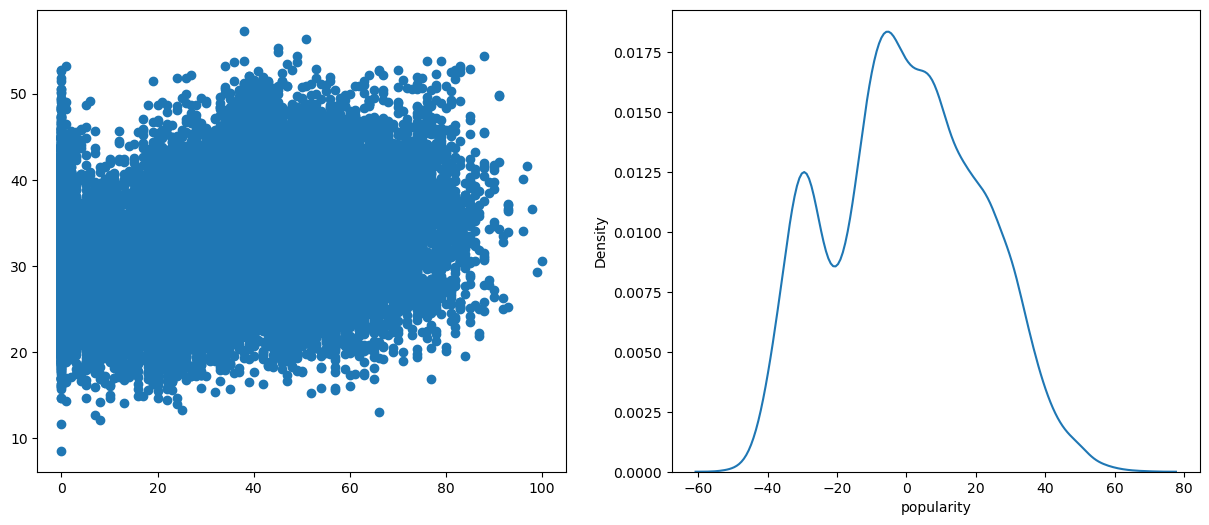

In [75]:
model(lr)

In [76]:
import warnings
warnings.filterwarnings("ignore")

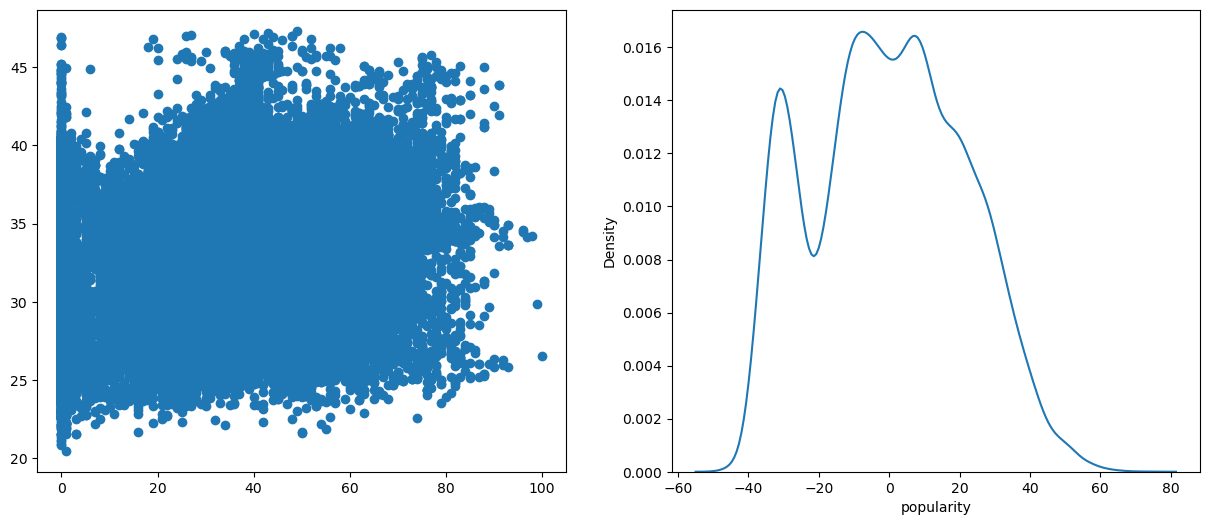

In [77]:
model(lasso)

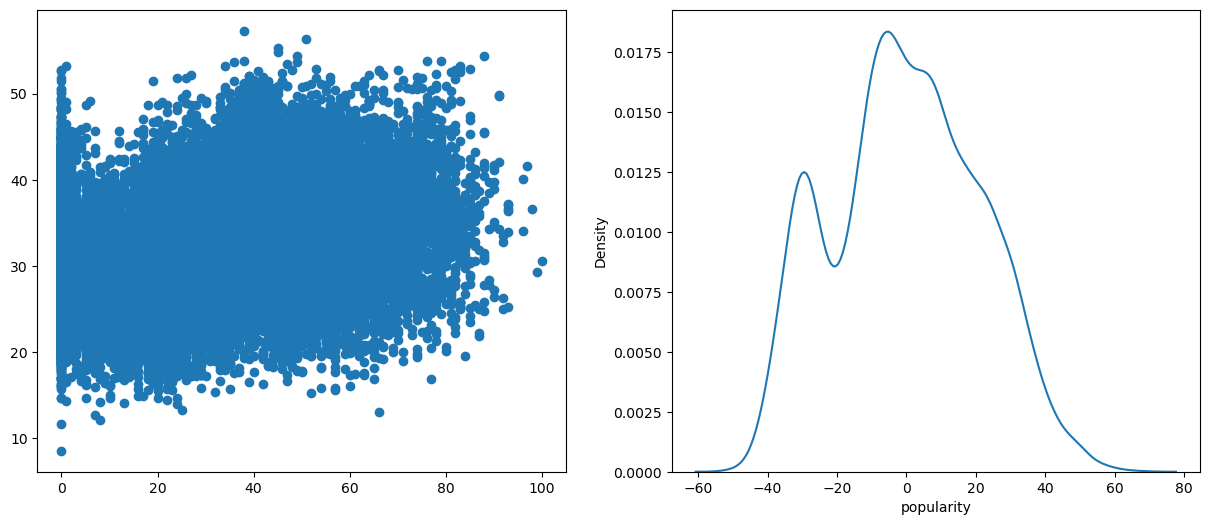

In [78]:
model(ridge)

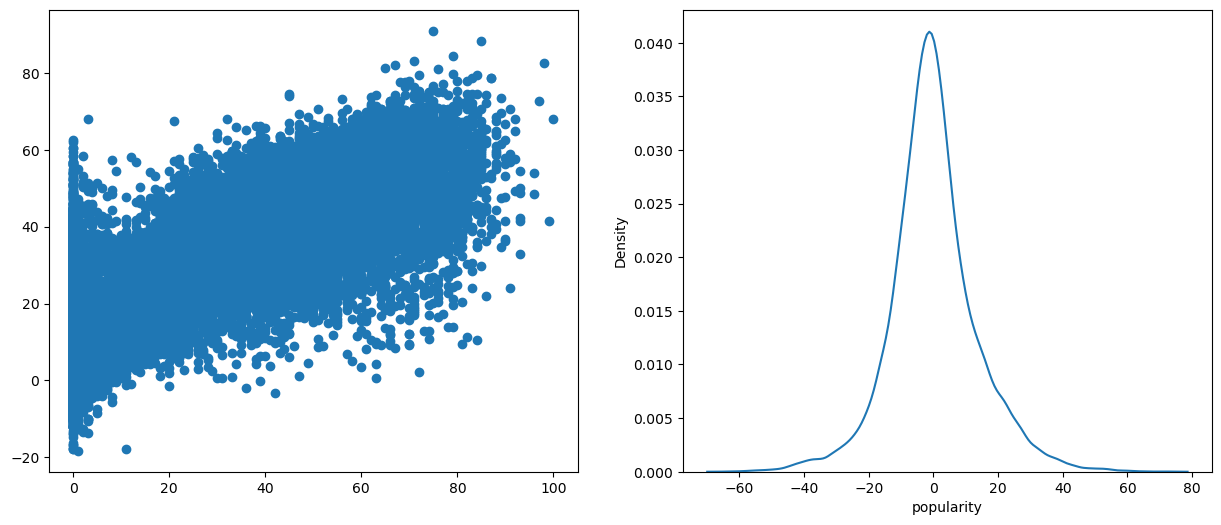

In [79]:
model(xgbreg)

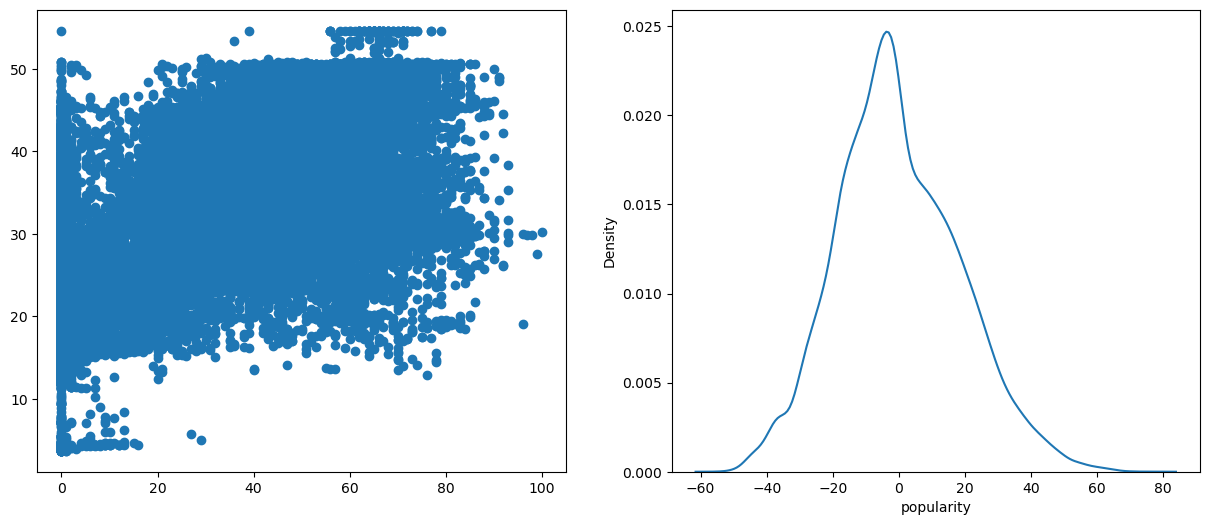

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.1-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.7 MB 778.2 kB/s eta 0:02:08
   ---------------------------------------- 0.2/99.7 MB 793.0 kB/s eta 0:02:06
   ---------------------------------------- 0.2/99.7 MB 793.0 kB/s eta 0:02:06
   ---------------------------------------- 0.3/99

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hisham\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hisham\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.1-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.0/99.7 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.1/99.7 MB 654.9 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.7 MB 654.9 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.7 MB 615.9 kB/s eta 0:02:42
   ---------------------------------------- 0.2/99.7 MB 655.9 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.7 MB 655.9 kB/s eta 0:02:32
   ----------------------

In [80]:
model(xgbrfreg)

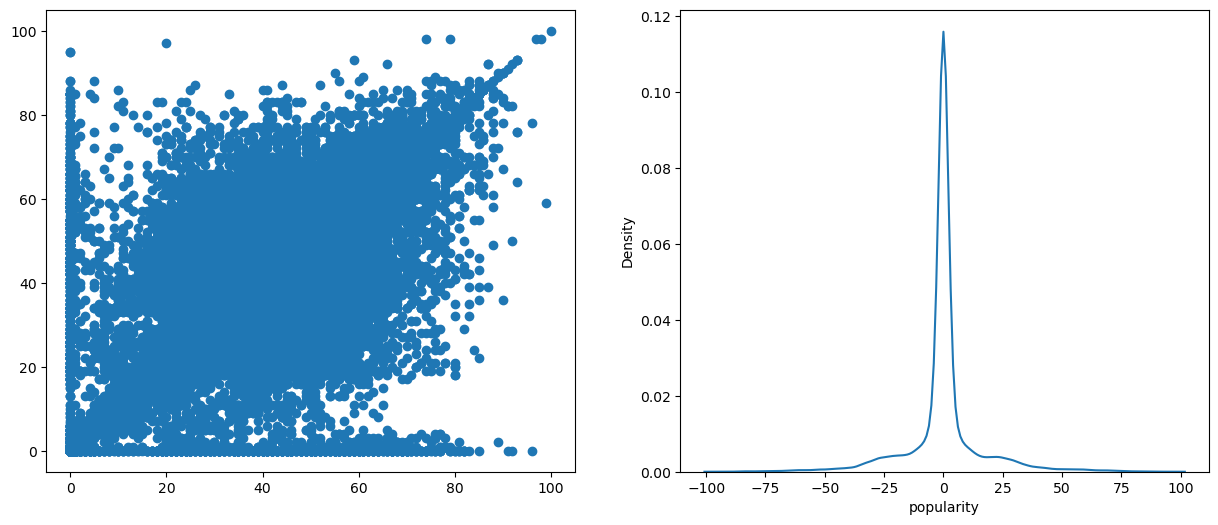

In [81]:
model(dtree)

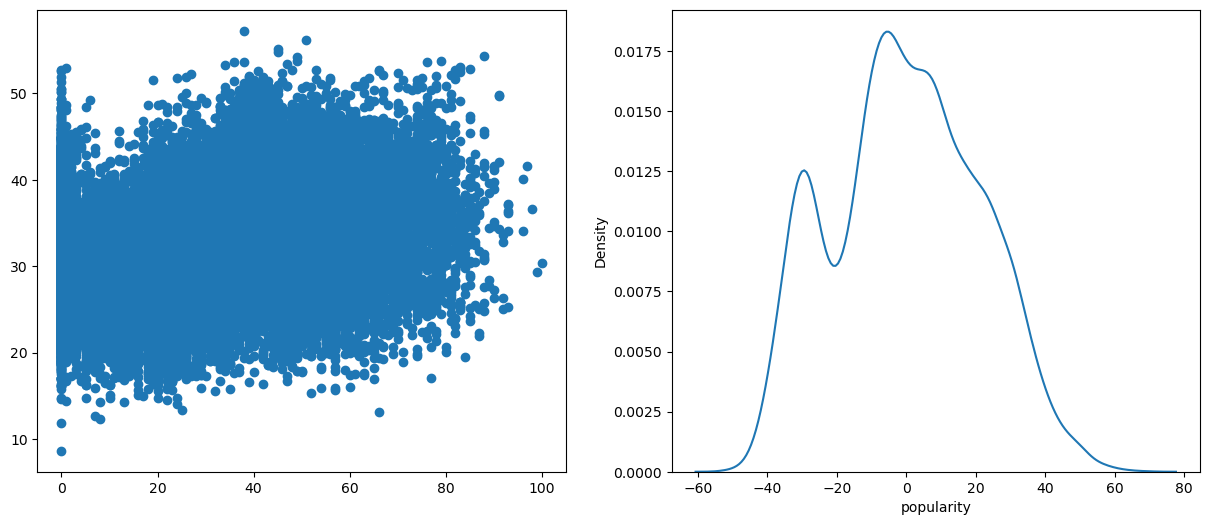

In [82]:
model(bayridge)

 1.Xgboost is giving the most promising results among the models

 2.Linear models do not perform well

 3.Decission tree is also performing well

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [84]:
algos=[lr, lasso, ridge, xgbreg, xgbrfreg, dtree, bayridge]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

In [86]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'XGBoostRandomForest','DecisionTree','BayesianRidge']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

metrics

,Model,MSE,ABMSE,R2_score
0,Linear Regression,455.348812,17.556276,0.077834
1,Lasso,465.894997,17.976374,0.056476
2,Ridge,455.348820,17.556298,0.077834
3,XGBoost,182.168277,9.821214,0.631075
4,XGBoostRandomForest,344.191634,14.793936,0.302948
5,DecisionTree,235.935696,7.760223,0.522186
6,BayesianRidge,455.357794,17.561725,0.077815


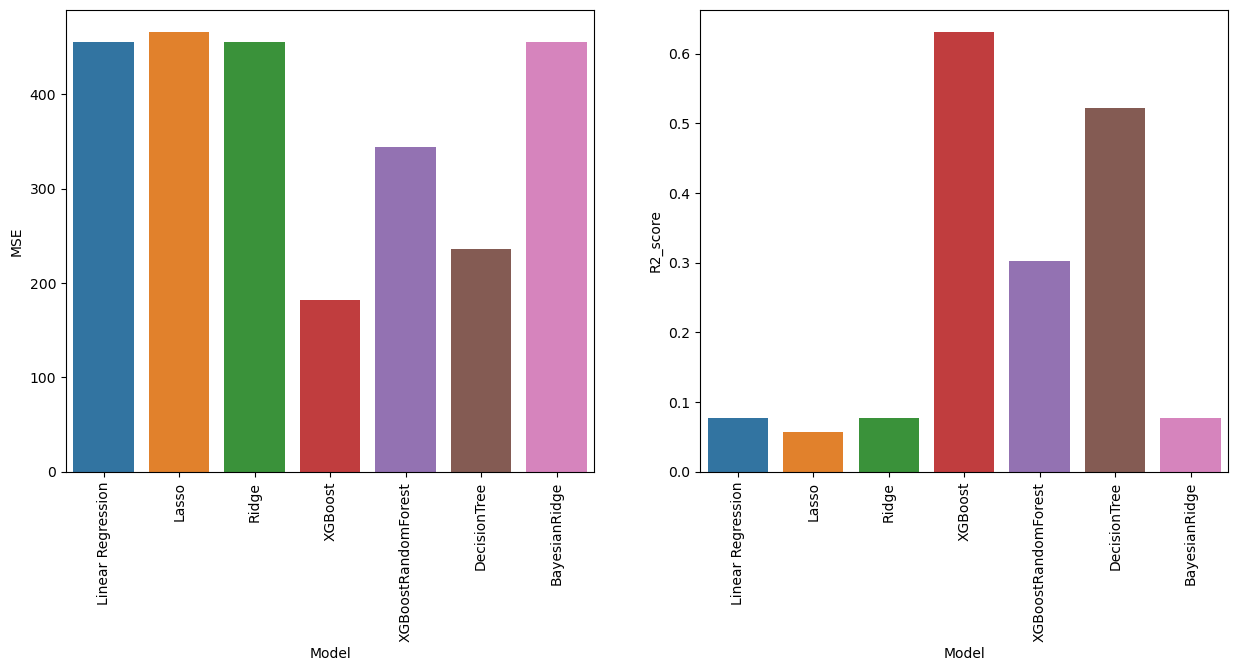

In [89]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()

From the above performance metrics, we see that the XGBoost (Regressor) and Decission Tree performs much better than the rest of the models.

XGBoost has the highest r2_score and the least mean squared error among the models, 0.62 and 186.87 correspondingly.

We would use this XGBoost model for future predictions.